<a href="https://colab.research.google.com/github/durg3sh10/Noisy_dataset/blob/main/Noise_in_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<u>**What do you mean by Noise in given Dataset?**


Noisy data are data with a large amount of additional meaningless information in it called noise. This includes data that is corrupted or distorted.

While collecting data, humans tend to make mistakes and instruments tend to be inaccurate, so the collected data has some error bound to it. This error is referred to as noise.

Noisy data in data set can significantly impact prediction of any meaningful information, algorithms can think of noise to be a pattern and can start generalizing from it, which of course is undesirable.Therefore, the problem of identifying and handling noise in prediction application has drawn considerable attention over past many years.

Studies have shown that noise in data set dramatically led to decreased classification accuracy and poor prediction results.
Improper procedures to subtract out the noise in data can lead to a false sense of accuracy or false conclusions.



In the real world, we don’t get to observe Functions $f(x)$ directly, but instead get noisy observations $y$, where

y = f(x) + ϵ
 
Here we will assume that $ϵ$ is random variable distributed according to a zero-mean Gaussian with standard deviation $σ^{2}_{ϵ}$. Note that because 
$ϵ$ is a random variable, $y$ is also a random variable.

As an example, say that the true function $f(x)$ we want to determine has the following form (though we don’t know it)

$f(x) = sin(πx)$

Thus the observations $y$, we get to see have the following distribution.

$ y = sin(πx) + N(0,σ^{2}_{ϵ}) $


Below we define the function $f(x)$ and display it, then draw a few observation samples $y$, and display them as well

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(123)
legend_size = 14
obs = 10
noise_std = 1.

x = 2 * (np.random.rand(obs) - .5)
x_grid = np.linspace(-1, 1, 100)

In [ ]:
def f(x):
    """Base function"""
    return np.sin(x * np.pi)

def sample_fx_data(shape, noise_std):
    """Sample function"""
    return f(x) + np.random.randn(*shape) * noise_std

def plot_fx_data(y=None):
    """Plot f(x) and noisy samples"""
    fig, axs = plt.subplots(figsize=(10,8))
    plt.plot(x_grid, f(x_grid), color = "black", label='f(x)')
    plt.scatter(x, y, s = 100, edgecolor = "red", label = 'y', facecolors = 'none')

(-2.0, 2.0)

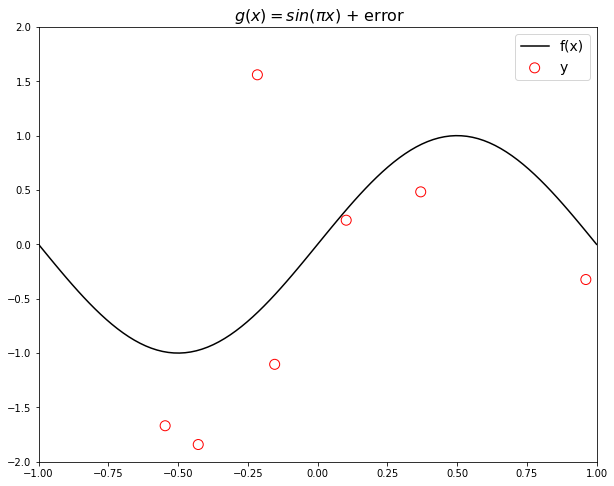

In [ ]:
# Plot the data
y = sample_fx_data(x.shape, noise_std)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f' $g(x) = sin(\pi x)$ + error', fontsize=16)
plt.xlim([-1, 1])
plt.ylim([-2, 2])

Our goal is to characterize the function $f(x)$, but we don’t know the function form of $f(x)$, we must instead estimate some other function $g(x)$ that we believe will provide an accurate approximation to $f(x)$. The function $g(x)$ is called an estimator of $f(x)$.

 In general, an estimator can capture a wide range of functional forms.

One such class of estimators is the weighted combination of ordered polynomials:
 
$g_{D}(x)=θ_{0} + θ_{1}x + θ_{2}x^{2} + … + θ_{D}x^{D}$

As the polynomial order D increases, the functions $g_{D}(x)$ are able to capture increasingly complex behavior.

## We don't want our model to overfit or underfit. In order to manage noisy data,  here are some techniques that are extensively used :

#1. **Train-Test split**

To begin with, the train-test split is a technique for evaluating the performance of a machine learning algorithm.Splitting your dataset is essential for an unbiased evaluation of prediction performance.

The procedure involves taking a dataset and dividing it into two subsets.

* Train Dataset: Used to fit the machine learning model.
* Test Dataset: Used to evaluate the fit machine learning model.




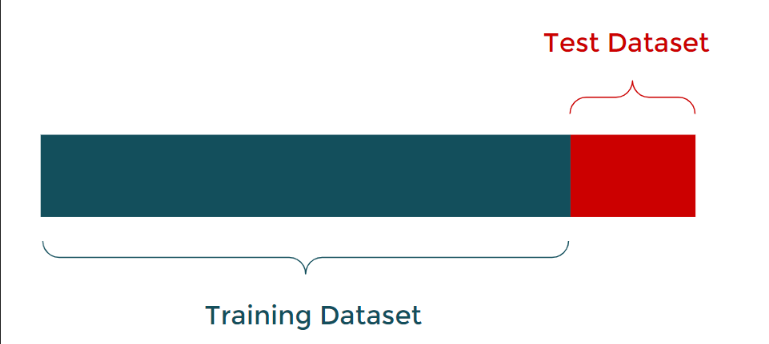

####The scikit-learn (sklearn)  Machine Learning library in Python provides an implementation of the train-test split evaluation procedure via the train_test_split() function imported from sklearn.model_selection 

#2. Cross Validation

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. 

In K Fold cross validation, the data is divided into k subsets, we train our model on k-1 subsets and hold the last one for test. This process is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are used as a training set. We then average the model against each of the folds and then finalize our model.

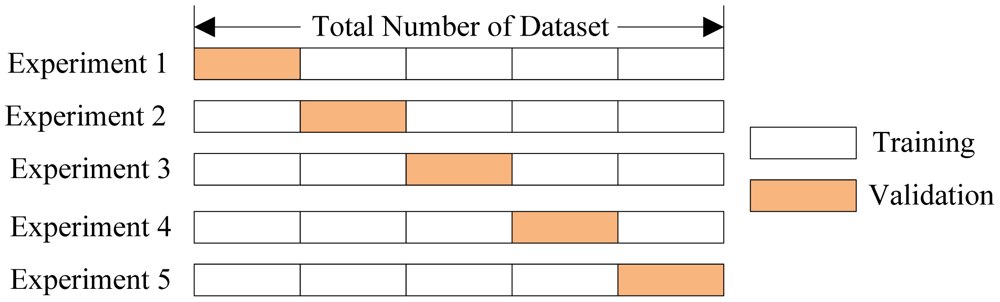

Cross-validation gives a more accurate measure of model quality. However, it can take more time to run, because it estimates models once for each fold. 

###Trade-offs Between Cross-Validation and Train-Test Split :

On small datasets, the extra computational burden of running cross-validation isn't a big deal. These are also the problems where model quality scores would be least reliable with train-test split. So, if your dataset is smaller, you should run cross-validation.

For the same reasons, a simple train-test split is sufficient for larger datasets. It will run faster, and you may have enough data that there's little need to re-use some of it for holdout.

The simplest way to use cross-validation is to call the cross_val_score helper function from sklearn.model_selection on the estimator and the dataset.

#3. Regularization


###Bias–Variance tradeoff

####What is bias?
Bias is the difference between the Predicted Value and the Expected Value.
Model with high bias oversimplifies the model and pays very little attention to the training data. It always leads to high error on training and test data.

####What is variance?
Variance is the amount that the estimate of the target function will change if different training data was used.
Model with high variance pays a lot of attention to training data and does not generalize on the unseen data. As a result, such models perform very well on training data but has high error rates on test data.


###There is inverse relationship between bias and variance in machine learning.
* Increasing the bias will decrease the variance.
* Increasing the variance will decrease the bias.

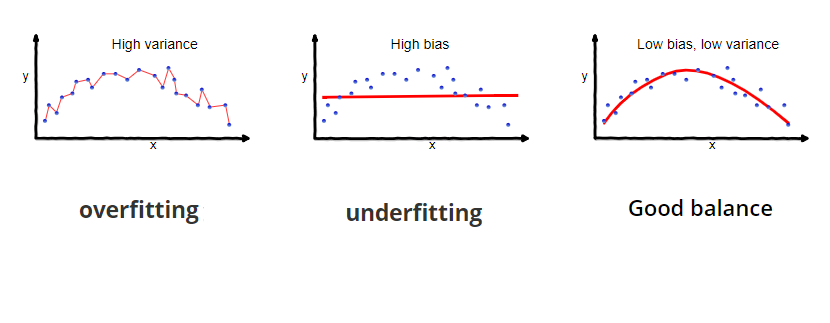

####Underfitting happens when a model unable to capture the underlying pattern of the data. These models usually have high bias and low variance.


####Overfitting happens when our model captures the noise along with the underlying pattern in data. It happens when we train our model a lot over noisy dataset. These models have low bias and high variance.



####We need to find the optimal fit for the dataset. Finding the right balance between the bias and variance of the model is called the Bias-Variance trade-off.



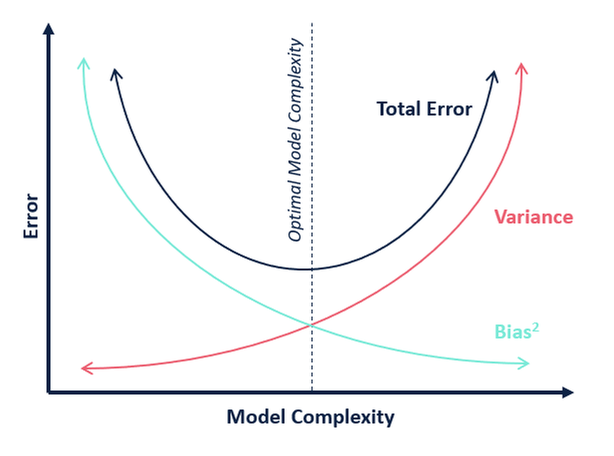

The expected prediction error, 

## $Error = Variance + Bias^{2} + Irreducible \ error$

####When we think our model is too complex (models that have low bias, but high variance). It is a method for "constraining" or "regularizing" the size of the coefficients ("shrinking" them towards zero). In regularization, a penalty term is added to the algorithm’s cost function, which represents the size of the weights (parameters) of the algorithm.

Residual sum of squares (RSS) is given as

$$RSS = \sum_{i=1}^n \left( y_i - ( \beta_0 + \sum_{j=1}^p \beta_jx_{ij} ) \right)^2$$

where:

- $n$ is the **total number of observations (data)**.
- $y_i$ is the **actual output value of the observation (data)**.
- $p$ is the **total number of features**.
- $\beta_j$ is a **model's coefficient**.
- $x_{ij}$ is the **$i_{th}$ observation, $j_{th}$ feature's value**.
- $\beta_0 + \sum_{j=1}^p \beta_jx_{ij}$ is the **predicted output of each observation**.

There are 2 commonly used techniques in regularization:

* Lasso regression (L1 regularization):

  In Lasso regression we minimize,

  $$\text{RSS} + \lambda \sum_{j=1}^p \lvert \beta_j \rvert$$

  Lasso regression shrinks coefficients all the way to zero, thus removing them from the model.


* Ridge regression (L2 regularization):

  In Ridge regression we minimize,

  $$\text{RSS} + \lambda \sum_{j=1}^p \beta_j^2$$

  Ridge regression shrinks coefficients toward zero, but they rarely reach zero



Where $\lambda$ is a **tuning parameter**

* A tiny $\lambda$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression.
* Increasing $\lambda$ penalizes the coefficients and thus shrinks them towards zero.

#4. PCA

Noise can also be  unwanted data items, features or records which do not help in explaining the feature itself, or the relationship between feature & target.

One of the ways to deal with unwanted features is to do Feature selection.
Feature Selection is the process where we select those features which contribute most to our model and thus removing or combining features.

We can also use an important unsupervised Machine Learning algorithm for dimensionality reduction called Principal Component Analysis (PCA).

PCA is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables, thus PCA reduces the number of variables of a data set, while preserving as much information as possible.






#5. Collecting more data

To handle noisy data, we can collect more data. The more data we collect, the better will we be able to estimate the underlying true function. This will eventually help in reducing the effect of noise from our dataset.

## Some of the origins of noise :


 * **Outliers**

Outliers are extreme values that are outside the range of what is expected. Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.

If actual outliers are not removed from the data set, they corrupt the results to a small or large degree depending on circumstances.

 If valid data is identified as an outlier and is mistakenly removed, that also corrupts results.

* Duplicate Data 

It is necessary to see whether the dataset has duplicate entries, if present it is required to remove the duplicate entries or else it might create a poor model.

* Missing Data (NaN values)

In my opinion, handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.
In general datasets simply arrive with missing data, either because it exists and was not collected or it never existed.

Some of the methods for dealing with missing data are removing Rows, Replacing the Nan values with Mean/Median/Mode, using algorithms which support missing values like KNN or Random Forest, Predicting the missing values.

#**Conclusion :**

###Every dataset comes with some noise. It is important for all Data Scientists to understand the impact the noise can create on the model, therefore it becomes very much important for any Data Scientist to take care of the noise when applying any Machine Learning algorithm.